In [1]:
import os

In [3]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [5]:
etopodata = Dataset('etopo5.cdf')

In [8]:
print(etopodata.variables.keys())

odict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


In [9]:
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin = etopodata.variables['ROSE'][:]

topoin,lons = shiftgrid(180.,topoin,lons,start=False)

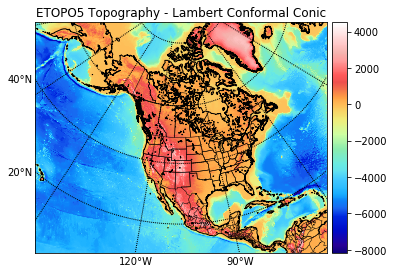

In [22]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=100.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

#劃定海岸線和邊境界限
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# 繪製經緯線
#以20度為間隔畫出0度到北緯80度緯線， 並且在圖像左側設置緯線標籤
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

#以30度為間隔畫出經線， 並且在圖像下側設置經線標籤
meridians = np.arange(0,360.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

im = m.imshow(topodat,cm.GMT_haxby)

# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')

plt.show()